# Pycaret

Crear entorno virtual

In [1]:
%python -m venv ./venv

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


Activar entorno virtual

In [2]:
%.\venv\Scripts\activate

UsageError: Line magic function `%.\venv\Scripts\activate` not found.


Instalar dependencias

In [3]:
%pip install ipykernel pycaret[full]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

¿Qué es Pycaret?

Biblioteca Open-Source y Low-Code de Python para automatizar el flujo de trabajo del Machine Learning. Es una herramiento End-to-End para Machine Learning y la gestión de modelos que aumenta exponencialmente la velocidad de los experimentos, mejorando la productividad.

Está dividio por módulos:
* Aprendizaje Supervisado:
  * Clasificación
  * Regresión
* Aprendizaje No Supervisado:
  * Clustering
  * Detección de Anomalías
* Series de tiempo
* Datasets

## Primer experimento con Pycaret

Crearemos un modelo de clasificación.

In [2]:
data = pd.read_csv(r'datasets/diabetes.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pycaret tiene dos APIs con las que podemos trabajar: la funcional y la orientada a objetos.

API Funcional

In [3]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


API Orientada a Objetos

In [6]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Setup

Con esta función inicializamos nuestro experimento en Pycaret y se comienza a preparar el pipeline de transformación de los datos a partir de los parámetros indicados. Debe ser la primero función que llamemos (sin tener en cuenta el *get_data*).

Los únicos parámetros requeridos son: *data* y *target*; el resto son opcionales.

In [7]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Compare Models

Con esta función entrenamos y evaluamos el rendimiento de todos los posibles estimadores o modelos disponibles en Pycaret, usando Cross-Validation. El output es una cuadrícula de puntajes con los promedios obtenidos mediante Cross-Validation. 

In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7784,0.8284,0.5819,0.7369,0.6397,0.4851,0.4994,0.4390
lda,Linear Discriminant Analysis,0.7784,0.8304,0.5819,0.7327,0.6395,0.4848,0.4977,0.0070
ridge,Ridge Classifier,0.7747,0.0000,0.5661,0.7344,0.6297,0.4740,0.4883,0.0230
nb,Naive Bayes,0.7599,0.8160,0.5930,0.6858,0.6275,0.4537,0.4616,0.0050
catboost,CatBoost Classifier,0.7579,0.8205,0.5664,0.6888,0.6118,0.4410,0.4526,0.4630
qda,Quadratic Discriminant Analysis,0.7525,0.8166,0.5775,0.6718,0.6149,0.4356,0.4424,0.0130
et,Extra Trees Classifier,0.7524,0.8100,0.5605,0.6824,0.5995,0.4275,0.4427,0.0280
gbc,Gradient Boosting Classifier,0.7449,0.8158,0.5398,0.6773,0.5874,0.4096,0.4239,0.0190
rf,Random Forest Classifier,0.7393,0.8114,0.5401,0.6601,0.5857,0.4005,0.4101,0.0370
ada,Ada Boost Classifier,0.7336,0.7854,0.5398,0.6396,0.5749,0.3865,0.3961,0.0150


In [9]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Evaluate Model

Esta función sirve para analizar el rendimiento del modelo entrenado con el conjunto de test.

In [10]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Para generar gráficos específicos utilizamos la siguiente función:

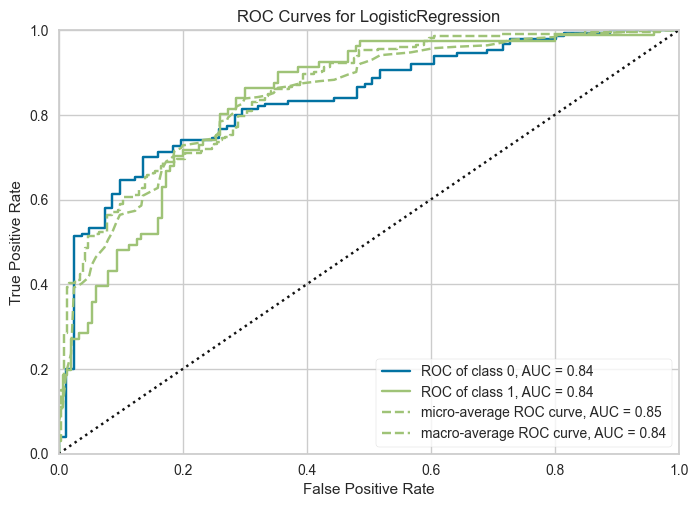

In [11]:
plot_model(best, plot = 'auc')

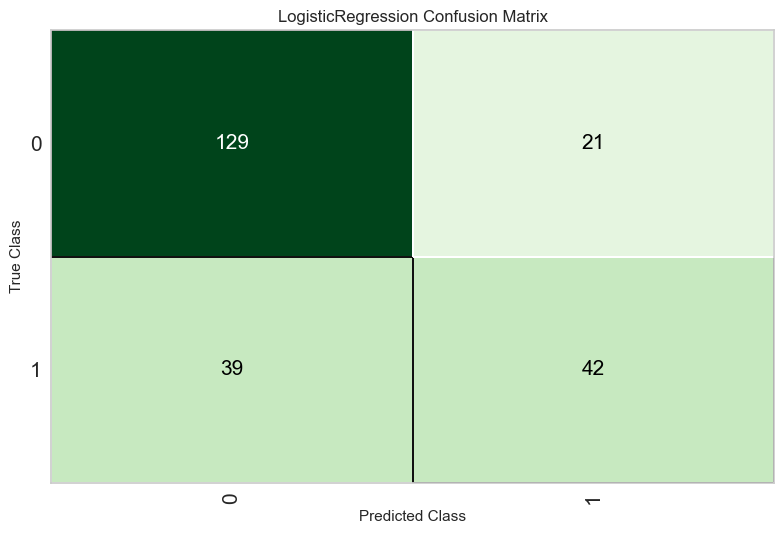

In [12]:
plot_model(best, plot = 'confusion_matrix')

### Predict Model

Esta función nos sirve para realizar las predicciones. Retorna la clase predicha y también la probabilidad. Por defecto las predicciones se realizan sobre el conjunto de entrenamiento.

In [13]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7403,0.8376,0.5185,0.6667,0.5833,0.3989,0.4056


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
730,3,130,78,23,79,28.400000,0.323,34,1,0,0.7718
198,4,109,64,44,99,34.799999,0.905,26,1,0,0.7019
24,11,143,94,33,146,36.599998,0.254,51,1,1,0.7257
417,4,144,82,32,0,38.500000,0.554,37,1,1,0.6318
387,8,105,100,36,0,43.299999,0.239,45,1,0,0.5572
...,...,...,...,...,...,...,...,...,...,...,...
94,2,142,82,18,64,24.700001,0.761,21,0,0,0.7521
437,5,147,75,0,0,29.900000,0.434,28,0,0,0.5020
86,13,106,72,54,0,36.599998,0.178,45,0,1,0.5253
221,2,158,90,0,0,31.600000,0.805,66,1,1,0.6242


Podemos especificar el conjunto de datos sobre el cual queremos que se realicen las predicciones.

In [14]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7760,0.8375,0.5746,0.7264,0.6417,0.4820,0.4890


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6810
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9585
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.8043
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9571
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8257


Además, podemos obtener la probabilidad para cada clase.

In [15]:
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7760,0.8375,0.5746,0.7264,0.6417,0.4820,0.4890


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score_0,prediction_score_1
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.3190,0.6810
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9585,0.0415
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.1957,0.8043
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9571,0.0429
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.1743,0.8257


### Save Model

Podemos guardar nuestro modelo y todo el pipeline del preprocesamiento asociado al Setup utilizando esta función.

In [16]:
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

### Load Model

Podemos cargar nuestro modelo y pipeline guardamos anteriormente utilizando esta función.

In [17]:
loaded_model = load_model('my_first_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\alexg\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weigh...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
          

In [18]:
predict_model(loaded_model, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7760,0.8375,0.5746,0.7264,0.6417,0.4820,0.4890


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6810
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9585
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.8043
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9571
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8257
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,0,0.7048
764,2,122,70,27,0,36.799999,0.340,27,0,0,0.6839
765,5,121,72,23,112,26.200001,0.245,30,0,0,0.8199
766,1,126,60,0,0,30.100000,0.349,47,1,0,0.7409


## Setup

Ya vimos que esta función es la primera que ejecutamos y la encargada de generar el pipeline para cargar, procesar y transformar nuestro conjunto de datos. Vamos a entrar más en detalle.

In [4]:
s = setup(data, target = 'Class variable', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Parámetros Obligatorios

Solo hay dos parámetros requeridos en el Setup:
* target: float, int, str o secuencia, valor predeterminado = -1
  
    Si es int o str, respectivamente, índice o nombre de la columna objetivo en los datos. El valor predeterminado selecciona la última columna en el conjunto de datos. 

* data: dataframe-like = None
  
    Conjunto de datos con forma (n_samples, n_features), donde n_samples es el número de muestras y n_features es el número de características. Si los datos no son un dataframe de pandas, se convierten a uno utilizando nombres de columna predeterminados.

Nota: target no es necesario cuando se trabaja con Clustering o Detección de Anomalías.

### Preparación de los Datos

#### Valores Faltantes

* imputation_type: string, default = 'simple'

  El tipo de imputación a utilizar. Puede ser simple o iterativa. Si es None, no se realiza ninguna imputación de valores faltantes.
* numeric_imputation: int, float, or string, default = ‘mean’

  Estrategia de imputación para columnas numéricas. Se ignora cuando imputation_type= iterative. Elegir entre:
  * drop: Eliminar filas con valores faltantes.
  * mean: Imputar con el promedio de la columna.
  * median: Imputar con la mediana de la columna.
  * mode: Imputar con la moda de la columna.
  * knn: Imputar usando un enfoque de K-Nearest Neighbors.
  * int or float: Imputar con un valor numérico.
* categorical_imputation: string, default = ‘mode’

  Estrategia de imputación para columnas categóricas. Se ignora cuando imputation_type= iterative. Elegir entre: 
  * drop: Eliminar filas con valores faltantes.
  * mode: Imputar con la moda.
  * str: Imputar con un String.
* iterative_imputation_iters: int, default = 5

  Número de Iteraciones. Se ignora cuando imputation_type=simple.
* numeric_iterative_imputer: str or sklearn estimator, default = 'lightgbm'

  Regresor para la imputación iterativa de valores faltantes en variables numéricas. Si es None, usa un LGBClassifier. Se ignora cuando imputation_type=simple.'
* categorical_iterative_imputer: str or sklearn estimator, default = 'lightgbm'

  Regresor para la imputación iterativa de valores faltantes en variables categóricas. Si es None, usa un LGBClassifier. Se ignora cuando imputation_type=simple.'

Comparación entre Imputación Simple Vs Imputación Iterativa

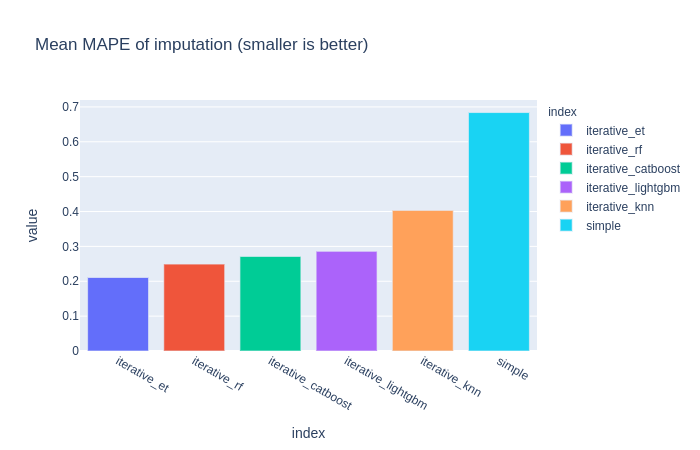

In [6]:
hepatitis = pd.read_csv(r'datasets/hepatitis.csv')
hepatitis.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


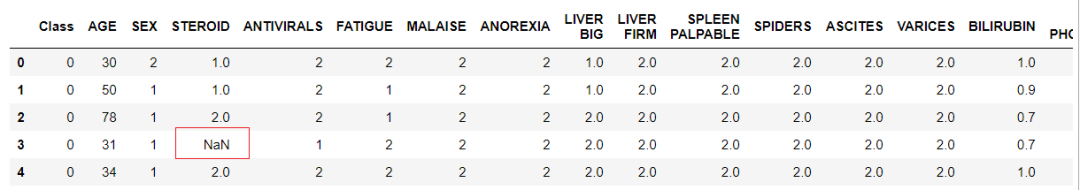

In [30]:
from pycaret.classification import *
setup(data = hepatitis, target = 'Class',session_id=42)

,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Rows with missing values,48.1%
9,Preprocess,True


* Rows with missing values:	48.1%
* Preprocess:	True
* Imputation type:	simple
* Numeric imputation:	mean
* Categorical imputation:	mode

In [23]:
hepatitis.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [31]:
exp = setup(data = hepatitis, target = 'Class', numeric_imputation='knn', session_id=42)

,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Rows with missing values,48.1%
9,Preprocess,True


In [29]:
exp.X_transformed

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
44,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.98,64.599998,86.0,3.64,52.599998,1.0
64,27.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.80,81.000000,38.0,4.20,79.800003,1.0
73,50.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.50,100.000000,100.0,5.30,62.599998,1.0
6,51.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.70,117.800003,132.0,3.88,55.799999,1.0
125,28.0,1.0,2.0,2.0,1.0,1.0,1.0,1.6,1.8,2.0,1.0,1.0,2.0,1.00,66.599998,20.0,4.00,82.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,24.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.80,82.000000,39.0,4.30,79.800003,1.0
74,32.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.00,55.000000,45.0,4.10,56.000000,1.0
47,28.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.80,191.000000,420.0,3.30,46.000000,1.0
97,47.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.00,84.000000,23.0,4.20,66.000000,2.0


In [28]:
exp.X_transformed.isnull().sum()

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

#### Tipos de Datos

Pycaret tiene un algoritmo de inferencia que automáticamente detecta el tipo de dato de cada variable. Sin embargo, es nuestro deber asegurarnos que estos tipos son correctos, ya que muchos procesos dependen de ello; por ejemplo, la imputación de valores faltantes para datos categóricos y numéricos es diferente.

* numeric_features: list of string, default = None

    Si los tipos de datos no son correctos, se puede usar para especificar cuáles variables son numéricas. 
* categorical_features: list of string, default = None

    Si los tipos de datos no son correctos, se puede usar para especificar cuáles variables son categóricas. 
* date_features: list of string, default = None

    Si los tipos de datos no son correctos, se puede usar para especificar cuáles variables son fechas. Las variables relacionadas con la fecha y hora no se utilizan en el modelado. En su lugar, se realiza la extracción de características y las columnas de fecha y hora originales se ignoran durante el entrenamiento del modelo. Si la columna Fecha y hora incluye una marca de tiempo, también se extraerán las variables relacionadas con la hora.
* create_date_columns: list of str, default = ["day", "month", "year"]

    Nuevas columnas para crear a partir de las variables de fecha. Por detrás usa pandas.Series.dt; el formato de fecha y hora se infiere del primer valor no nulo.
* text_features: list of str, default = None

    Variables que contienen un Corpus. Si es None, no se selecciona ninguna variable.
* text_features_method: str, default = 'tf-idf'

    Método para realizar el embedding de las variblaes que tienen un corpus. Se puede seleccionar entre 'bow' (Bag of Words) o 'tf-idf' (TfidVectorizer).
* ignore_features: list of string, default = None

    Variables para ignorar durante el entrenamiento del modelo.

* keep_features: list of str, default = None

    Variables que queremos que se mantengan durante todo el proceso; por ejemplo, no serán eliminadas de ninguna manera durante la selección de características del preprocesamiento.

In [7]:
pokemon = pd.read_csv(r'datasets/pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [34]:
from pycaret.classification import *
exp = setup(data = pokemon, target = 'Legendary', session_id=42, categorical_features=["Type 1", "Type 2", "Generation"], ignore_features = ['#', 'Name'])

,Description,Value
0,Session id,42
1,Target,Legendary
2,Target type,Binary
3,Original data shape,"(800, 13)"
4,Transformed data shape,"(800, 50)"
5,Transformed train set shape,"(560, 50)"
6,Transformed test set shape,"(240, 50)"
7,Ignore features,2
8,Numeric features,7
9,Categorical features,3


In [35]:
exp.X_transformed

,Type 1_Water,Type 1_Fire,Type 1_Ground,Type 1_Rock,Type 1_Dragon,Type 1_Grass,Type 1_Normal,Type 1_Bug,Type 1_Psychic,Type 1_Ghost,...,Defense,Sp. Atk,Sp. Def,Speed,Generation_1.0,Generation_4.0,Generation_3.0,Generation_6.0,Generation_5.0,Generation_2.0
94,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,70.0,95.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0
437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,104.0,71.0,108.0,0.0,1.0,0.0,0.0,0.0,0.0
375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,40.0,70.0,55.0,0.0,0.0,1.0,0.0,0.0,0.0
773,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,50.0,150.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0
711,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,100.0,120.0,90.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,40.0,40.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0
713,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,129.0,90.0,108.0,0.0,0.0,0.0,0.0,1.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,65.0,65.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0
439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.0,81.0,76.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
exp.X_transformed.columns

Index(['Type 1_Water', 'Type 1_Fire', 'Type 1_Ground', 'Type 1_Rock',
       'Type 1_Dragon', 'Type 1_Grass', 'Type 1_Normal', 'Type 1_Bug',
       'Type 1_Psychic', 'Type 1_Ghost', 'Type 1_Dark', 'Type 1_Fighting',
       'Type 1_Fairy', 'Type 1_Flying', 'Type 1_Steel', 'Type 1_Ice',
       'Type 1_Electric', 'Type 1_Poison', 'Type 2_Ice', 'Type 2_Fighting',
       'Type 2_Psychic', 'Type 2_Fairy', 'Type 2_Fire', 'Type 2_Flying',
       'Type 2_Grass', 'Type 2_Steel', 'Type 2_Dragon', 'Type 2_Ghost',
       'Type 2_Dark', 'Type 2_Electric', 'Type 2_Rock', 'Type 2_Poison',
       'Type 2_Ground', 'Type 2_Bug', 'Type 2_Normal', 'Type 2_Water', 'Total',
       'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation_1.0', 'Generation_4.0', 'Generation_3.0', 'Generation_6.0',
       'Generation_5.0', 'Generation_2.0'],
      dtype='object')

#### Encoding

La mayoría de los algoritmos de Machine Learning no pueden trabajar directamente con las las variables categóricas así que debemos transformarlas en valores numéricos. 

El tipo más común de codificación categórica es One-Hot Encoding (también conocida como dummy encoding), donde cada etiqueta de la variable categórica se convierte en una característica separada en el conjunto de datos que contiene valores binarios (1 o 0).

PyCaret transformará todas las variables categóricas del conjunto de datos mediante One-Hot Encoding. Esto es ideal para variables que tienen datos categóricos nominales, es decir, los datos no se pueden ordenar. En otros escenarios diferentes, se deben utilizar otros métodos de codificación. Por ejemplo, cuando los datos son ordinales, es decir, los datos tienen niveles intrínsecos, se debe utilizar Ordinal Encoding.

* max_encoding_ohe: int, default = 25 

    Variables categóricas cuyo número de posibles niveles o etiquetas sea menor entonces se codificarán usando One-Hot Encoding. De lo contrario, se utilizará el método de codificación proporcionado. 
* encoding_method: category-encoders estimator, default = None 

    Encoder para codificar las variables categóricas que tienen más de max_encoding_ohe valores únicos. Si es None, category_encoders.leave_one_out.LeaveOneOutEncoder es usado por defecto.

In [37]:
exp.X_transformed

,Type 1_Water,Type 1_Fire,Type 1_Ground,Type 1_Rock,Type 1_Dragon,Type 1_Grass,Type 1_Normal,Type 1_Bug,Type 1_Psychic,Type 1_Ghost,...,Defense,Sp. Atk,Sp. Def,Speed,Generation_1.0,Generation_4.0,Generation_3.0,Generation_6.0,Generation_5.0,Generation_2.0
94,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,70.0,95.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0
437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,104.0,71.0,108.0,0.0,1.0,0.0,0.0,0.0,0.0
375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,40.0,70.0,55.0,0.0,0.0,1.0,0.0,0.0,0.0
773,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,150.0,50.0,150.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0
711,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,100.0,120.0,90.0,95.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,40.0,40.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0
713,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,129.0,90.0,108.0,0.0,0.0,0.0,0.0,1.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,65.0,65.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0
439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.0,81.0,76.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0


Cuando las variables categóricas del conjunto de datos contienen variables con orden natural intrínseco, como Bajo, Medio y Alto, estas deben codificarse de manera diferente a las variables nominales (donde no hay un orden intrínseco, por ejemplo, Masculino o Femenino). Esto se puede lograr usando el parámetro ordinal_features en el Setup; este parámetro acepta un diccionario con nombres de variables y los niveles en orden creciente de menor a mayor.

In [8]:
employee = pd.read_csv(r'datasets/employee.csv')
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [39]:
from pycaret.classification import *
exp = setup(data = employee, target = 'left', session_id=42, ordinal_features = {'salary' : ['low', 'medium', 'high']})

,Description,Value
0,Session id,42
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,2


In [40]:
exp.X_transformed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_technical,department_management,department_IT,department_sales,department_support,department_product_mng,department_RandD,department_marketing,department_accounting,department_hr,salary_1.0,salary_2.0,salary_0.0
9047,0.77,0.79,3.0,273.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12494,0.84,1.00,5.0,218.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12427,0.55,0.60,3.0,180.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13785,0.49,0.52,4.0,161.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13190,0.97,0.63,5.0,258.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,0.62,0.64,3.0,165.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9651,0.16,0.56,5.0,152.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9137,0.69,0.62,4.0,183.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14626,0.42,0.48,2.0,155.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


#### Datos Desbalanceados

Cuando el conjunto de datos de entrenamiento tiene un desbalanceo de la clase objetivo, se puede solucionar utilizando el parámetro fix_imbalance en el Setup. Cuando se establece en True, SMOTE (Synthetic Minority Over-sampling Technique) se utiliza como método predeterminado para el remuestreo. El método de remuestreo se puede cambiar utilizando fix_imbalance_method dentro de la configuración.

* fix_imbalance: bool, default = False

    Cuando es True, el conjunto de entrenamiento es remuestrado usando el algoritmo definido en fix_imbalance_method. Cuando es None, se utiliza por defecto SMOTE.
* fix_imbalance_method: str or imblearn estimator, default = 'SMOTE'

    Algoritmo para realizar el remuestreo. Se puede escoger un estimador de imblearn o crear uno personalizado. Es ignorado cuando fix_imbalance=False.

In [9]:
credit = pd.read_csv(r'datasets/credit.csv')
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


<AxesSubplot: xlabel='default', ylabel='count'>

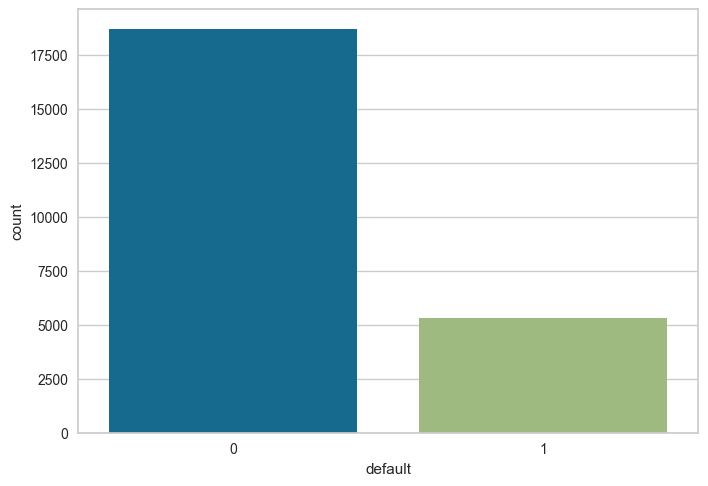

In [47]:
sns.countplot(data=credit, x='default')

In [54]:
from pycaret.classification import *
exp = setup(data = credit, target = 'default', session_id=42, fix_imbalance = True)

,Description,Value
0,Session id,42
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(33372, 24)"
5,Transformed train set shape,"(26172, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


<AxesSubplot: xlabel='default', ylabel='count'>

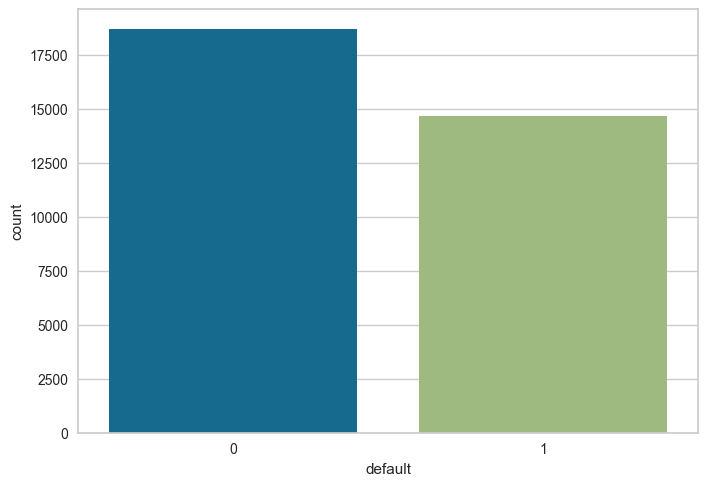

In [60]:
sns.countplot(data=exp.dataset_transformed, x='default')

#### Outliers

La función remove_outliers en PyCaret le permite identificar y eliminar valores atípicos del conjunto de datos antes de entrenar el modelo. Los valores atípicos se identifican mediante la reducción de dimensionalidad lineal PCA utilizando la técnica de descomposición de valores singulares.

* remove_outliers: bool, default = False

  Cuando es True, los valores atípicos del conjunto de entrenamiento son removidos usando Isolation Forest.
* outliers_method: str, default = 'iforest'

  Método para la eliminación de valores atípicos. Es ignorado cuando remove_outliers=False. Los posibles valores son:
  * 'iforest': Uses sklearn's IsolationForest.
  * 'ee': Uses sklearn's EllipticEnvelope.
  * 'lof': Uses sklearn's LocalOutlierFactor.


* outliers_threshold: float, default = 0.0

  El porcentaje de valores atípicos que se eliminarán del conjunto de datos.. Ignored when remove_outliers=False.

In [10]:
insurance = pd.read_csv(r'datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot: xlabel='smoker', ylabel='charges'>

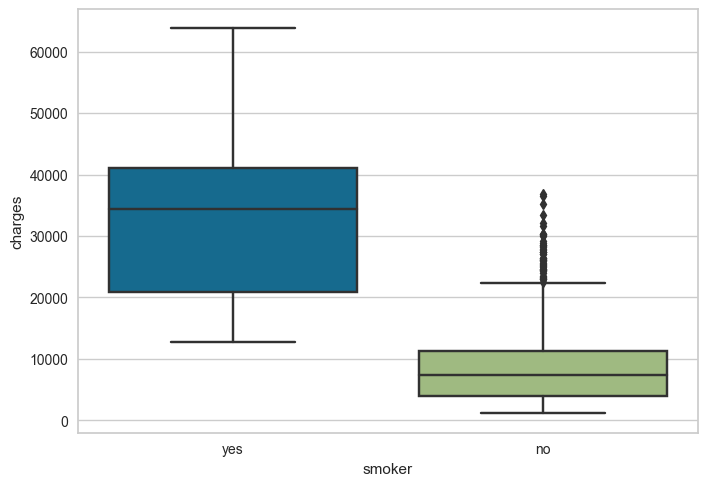

In [67]:
sns.boxplot(data=insurance, x='smoker', y='charges')

In [62]:
from pycaret.regression import *
exp = setup(data = insurance, target = 'charges', session_id=42, remove_outliers = True)

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1291, 10)"
5,Transformed train set shape,"(889, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


<AxesSubplot: xlabel='smoker', ylabel='charges'>

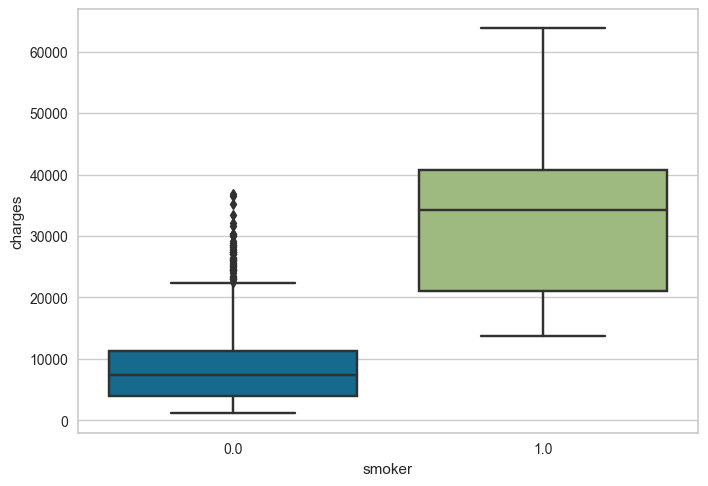

In [70]:
sns.boxplot(data=exp.dataset_transformed, x='smoker', y='charges')

#### Normalización

La normalización es una técnica que se aplica a menudo como parte de la preparación de datos para el Machine Learning. El objetivo de la normalización es reescalar los valores de las variables numéricas en el conjunto de datos sin distorsionar las diferencias en los rangos de valores ni perder información.

* normalize: bool, default = False

Cuando es True, las variables se normalizan utilizando el normalized_method. 
* normalize_method: string, default = ‘zscore’

    Define el método para realizar la normalización. Por defecto es ZScore. Otras opciones son:
  * z-score El ZScore es calculado como z = (x – u) / s
  * minmax escala y traduce cada variable individualmente de manera que esté en el rango de 0 – 1.
  * maxabs escala y traduce cada variable individualmente de modo que el valor absoluto máximo de cada característica sea 1,0. No desplaza ni centra los datos y, por lo tanto, no destruye la escasez.
  * robust escala y traduce cada variable de acuerdo con el rango intercuartil. Cuando el conjunto de datos contiene valores atípicos, el escalador robusto suele dar mejores resultados.

In [11]:
pokemon = pd.read_csv(r'datasets/pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [73]:
from pycaret.classification import *
exp = setup(data = pokemon, target = 'Legendary', session_id=42, normalize = True)

,Description,Value
0,Session id,42
1,Target,Legendary
2,Target type,Binary
3,Original data shape,"(800, 13)"
4,Transformed data shape,"(800, 47)"
5,Transformed train set shape,"(560, 47)"
6,Transformed test set shape,"(240, 47)"
7,Numeric features,9
8,Categorical features,3
9,Rows with missing values,48.2%


In [74]:
exp.X_transformed

,#,Name,Type 1_Water,Type 1_Fire,Type 1_Ground,Type 1_Rock,Type 1_Dragon,Type 1_Grass,Type 1_Normal,Type 1_Bug,...,Type 2_Normal,Type 2_Water,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
94,-1.283863,-0.299156,2.380476,-0.269809,-0.206955,-0.246183,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,0.323103,0.809133,-0.298928,0.217766,-0.074719,0.805500,0.053304,-1.366744
437,0.167607,-0.299156,-0.420084,3.706325,-0.206955,-0.246183,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,0.806980,0.260473,0.732530,-0.076166,0.962192,-0.041400,1.352616,0.424309
375,-0.065580,-0.299156,-0.420084,-0.269809,4.831959,-0.246183,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,-1.112128,-1.150366,-1.209037,-0.598710,-0.989640,-0.076687,-0.459583,-0.172709
773,1.647632,-0.299156,-0.420084,-0.269809,-0.206955,4.062019,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,0.528136,-0.758466,-0.905667,2.503899,-0.684666,2.746313,-0.630545,1.618344
711,1.376373,3.342740,-0.420084,-0.269809,-0.206955,-0.246183,4.945154,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,2.168399,2.180782,2.734770,0.870947,1.450150,0.629063,0.908114,1.021327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-0.703275,0.000000,-0.420084,-0.269809,-0.206955,-0.246183,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,-1.112128,-0.366566,0.004442,-0.762006,-0.989640,-1.135312,-1.314393,-0.769726
713,1.381132,0.000000,2.380476,-0.269809,-0.206955,-0.246183,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,1.184241,0.848323,-0.238254,0.544356,1.724626,0.629063,1.352616,1.021327
326,-0.260695,0.000000,-0.420084,-0.269809,-0.206955,-0.246183,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,-0.456022,-0.758466,-0.147243,0.054471,-0.227205,-0.253125,-0.630545,-0.172709
439,0.177125,0.000000,2.380476,-0.269809,-0.206955,-0.246183,-0.202218,-0.309662,-0.371768,-0.323321,...,-0.073389,-0.127804,-0.250990,-0.209806,-0.420275,-0.174143,0.260753,0.135038,-0.630545,0.424309


### Feature Engineering

#### Variables Polinómicas

En los proyectos de Machine Learning solemos suponer que la relación entre las variables dependientes e independientes es lineal; sin embargo, este no es siempre el caso. A veces la relación entre variables dependientes e independientes es más compleja. La creación de nuevas características polinómicas a veces puede ayudar a capturar esa relación, que de otro modo podría pasar desapercibida.

* polynomial_features: bool, default = False

    Cuando es True, nuevas variables son creadas basadas en combinaciones polinómicas entre las variables numéricas del conjunto de datos de acuerdo al grado del polinomio definido en el parámetro polynomial_degree.
* polynomial_degree: int, default = 2

    Grado polinomial de las variables.

In [12]:
juice = pd.read_csv(r'datasets/juice.csv')
juice.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [13]:
from pycaret.classification import *
exp = setup(data = juice, target = 'Purchase', session_id=42, polynomial_features = True)

,Description,Value
0,Session id,42
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 190)"
6,Transformed train set shape,"(749, 190)"
7,Transformed test set shape,"(321, 190)"
8,Ordinal features,1
9,Numeric features,17


In [14]:
exp.dataset_transformed

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,...,PctDiscMM PctDiscCH,PctDiscMM ListPriceDiff,PctDiscMM STORE,PctDiscCH^2,PctDiscCH ListPriceDiff,PctDiscCH STORE,ListPriceDiff^2,ListPriceDiff STORE,STORE^2,Purchase
408,409.0,243.0,1.0,1.86,1.99,0.00,0.80,0.0,1.0,0.277422,...,0.0,0.052261,0.402010,0.000000,0.000000,0.000000,0.0169,0.13,1.0,0
187,188.0,261.0,4.0,1.99,2.09,0.00,0.00,0.0,0.0,0.999033,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0100,0.40,16.0,0
431,432.0,272.0,7.0,1.86,2.13,0.00,0.00,0.0,0.0,0.218680,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0729,0.00,0.0,1
280,281.0,243.0,3.0,1.99,2.23,0.00,0.00,0.0,0.0,0.005765,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0576,0.72,9.0,1
649,650.0,249.0,2.0,1.89,2.09,0.00,0.00,0.0,0.0,0.891914,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0400,0.40,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,616.0,262.0,7.0,1.86,2.13,0.00,0.00,0.0,0.0,0.674286,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0729,0.00,0.0,0
799,800.0,276.0,7.0,1.99,2.13,0.00,0.54,0.0,1.0,0.416000,...,0.0,0.035493,0.000000,0.000000,0.000000,0.000000,0.0196,0.00,0.0,1
645,646.0,240.0,2.0,1.75,1.99,0.00,0.30,0.0,1.0,0.736119,...,0.0,0.036181,0.301508,0.000000,0.000000,0.000000,0.0576,0.48,4.0,0
808,809.0,264.0,7.0,1.86,2.13,0.37,0.00,1.0,0.0,0.836160,...,0.0,0.000000,0.000000,0.039571,0.053710,0.000000,0.0729,0.00,0.0,0


#### Variables de grupo

Cuando el conjunto de datos contiene variables que están relacionadas entre sí de alguna manera, por ejemplo: variables registradas en algunos intervalos de tiempo fijos; entonces se pueden crear nuevas variables estadísticas como media, mediana, varianza y desviación estándar para un grupo de dichas variables a partir de variables existentes. 

* group_features: list or list of list, default = None

    Cuando un conjunto de datos contiene variables que tienen características en común, se pueden crear variables estadísticas para dicho grupo. Por ejemplo, si el conjunto de datos tiene variabes numéricas relacionadas entre sí (‘Col1’, ‘Col2’, ‘Col3’), se crearán variables estadísticas como la media, mediana, moda y desviación estándar para ese grupo.
* group_names: list, default = None

    Nombre para las variables de grupo. Debe ser de la misma longitud que la lista pasada en el parámetro group_features.

In [15]:
credit = pd.read_csv(r'datasets/credit.csv')
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [18]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [25]:
from pycaret.classification import *
exp = setup(data = credit, target = 'default', session_id=42, group_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

AttributeError: 'list' object has no attribute 'items'

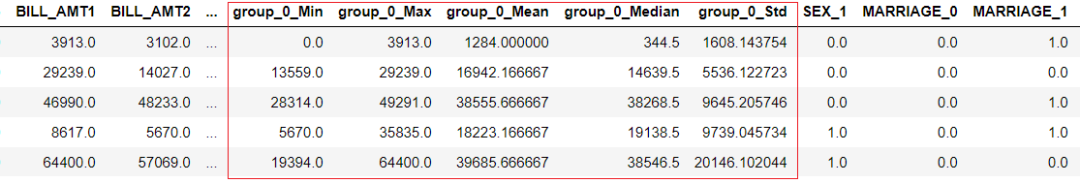

#### Agrupar Variables Numéricas

Feature Binning es un método para convertir variables continuas en valores categóricos utilizando un número predefinido de agrupaciones. Es eficaz cuando una característica continua tiene demasiados valores únicos o pocos valores extremos fuera del rango esperado. Estos valores extremos influyen en el modelo entrenado, afectando así la precisión de la predicción del modelo. En PyCaret, las variables numéricas continuas se pueden agrupar en intervalos utilizndo K-Means para convertirlas de numéricas continuas a categóricas.

* bin_numeric_features: list, default = None

    Lista de variables numéricas continuas para convertir en variables categóricas usando K-Means.

In [26]:
income = pd.read_csv(r'datasets/income.csv')
income.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [32]:
from pycaret.classification import *
exp = setup(data = income, target = 'income >50K', session_id=42, bin_numeric_features = ['age'])

,Description,Value
0,Session id,42
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(32561, 14)"
4,Transformed data shape,"(32561, 64)"
5,Transformed train set shape,"(22792, 64)"
6,Transformed test set shape,"(9769, 64)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,8


In [41]:
exp.X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
24029,43,Self-emp-not-inc,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,60,United-States
8788,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,1602,20,United-States
15564,34,Private,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States
9585,17,Private,10th,6,Never-married,Sales,Unmarried,White,Female,0,0,12,United-States
7377,41,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,0,36,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,40,Private,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,0,40,United-States
11796,62,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States
13863,49,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States
28801,45,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,1887,60,United-States


In [42]:
exp.X_transformed

,age,workclass_Self-emp-not-inc,workclass_Private,workclass_State-gov,workclass_Local-gov,workclass_Self-emp-inc,workclass_Federal-gov,workclass_Never-worked,workclass_Without-pay,education_11th,...,race_White,race_Black,race_Asian-Pac-Islander,race_Amer-Indian-Eskimo,race_Other,sex,capital-gain,capital-loss,hours-per-week,native-country
24029,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,0.245724
8788,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1602.0,20.0,0.245724
15564,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.245724
9585,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.245724
7377,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.245724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,0.245724
11796,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.245724
13863,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,0.245724
28801,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1887.0,60.0,0.245724


#### Combinar niveles raros

A veces, un conjunto de datos puede tener una variable categórica (o múltiples variables categóricas) que tiene un número muy alto de niveles (es decir, variables de alta cardinalidad). Si dicha variable (o variables) se codifica en valores numéricos, entonces la matriz resultante es una matriz muy grande. Esto no solo hace que el experimento sea lento debido al incremento múltiple en el número de características y, por lo tanto, el tamaño del conjunto de datos, sino que también introduce ruido en el experimento. Podemos evitar esto cominando los niveles raros en las variables que tienen una alta cardinalidad.

* rare_to_value: float or None, default=None

    Fracción mínima de ocurrencias de un nivel de una categoría. Si un nivel es menos frecuente que rare_to_value * len(X), es reemplazado con el string del parámetro rare_value. Esto se realiza antes del encoding.
* rare_value: str, default="rare"

    Valor para reemplazar los niveles raros.

In [43]:
income = pd.read_csv(r'datasets/income.csv')
income.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [44]:
from pycaret.classification import *
exp = setup(data = income, target = 'income >50K', session_id=42, rare_to_value = 0.1, rare_value='raros')

,Description,Value
0,Session id,42
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(32561, 14)"
4,Transformed data shape,"(32561, 29)"
5,Transformed train set shape,"(22792, 29)"
6,Transformed test set shape,"(9769, 29)"
7,Ordinal features,4
8,Numeric features,5
9,Categorical features,8


In [47]:
exp.dataset_transformed

,age,workclass,education_raros,education_Some-college,education_HS-grad,education_Bachelors,education-num,marital-status_Married-civ-spouse,marital-status_Never-married,marital-status_Divorced,...,relationship_Not-in-family,relationship_Unmarried,relationship_raros,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
24029,43.0,1.0,1.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,0.0,0
8788,18.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1602.0,20.0,0.0,0
15564,34.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0
9585,17.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0
7377,41.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,40.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,0.0,0
11796,62.0,0.0,0.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,0.0,0
13863,49.0,1.0,0.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,0.0,0
28801,45.0,0.0,0.0,0.0,0.0,1.0,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1887.0,60.0,0.0,1


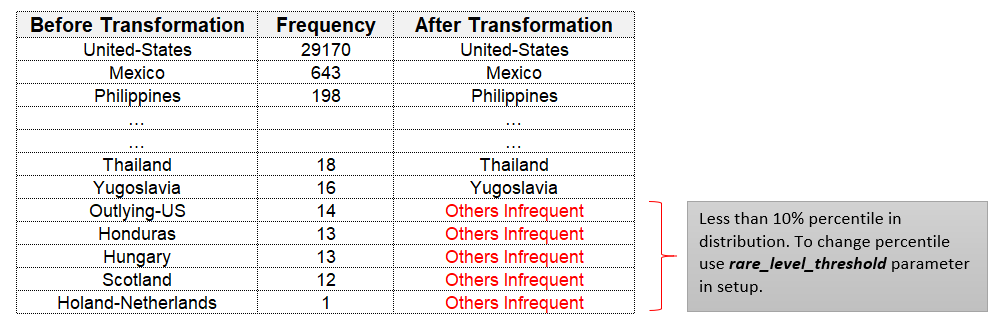

### Feature Selection

#### Feature Importance

Feature Importance es un proceso que se utiliza para seleccionar las variables del conjunto de datos que más contribuyen a la predicción de la variable objetivo. Trabajar con variables seleccionadas en lugar de todas reduce el riesgo de overfitting, mejora la precisión y reduce el tiempo de entrenamiento.

* feature_selection: bool, default = False

  Cuando es True, un subconjunto de variables es seleccionado a partir del puntaje de importancia determinado por feature_selection_estimator.
* feature_selection_method: str, default = 'classic'. 

  Algoritmo para la selección de variables.
  * 'univariate': sklearn SelectKBest.
  * 'classic': sklearn SelectFromModel.
  * 'sequential': sklearn SequentialFeatureSelector.
* feature_selection_estimator: str or sklearn estimator, default = 'lightgbm'

Clasificador usado para determinar la importancia de cada variable.
* n_features_to_select: int or float, default = 0.2

  El número máximo de variables para seleccionar. Si es <1 entonces se refiere a la fracción de variables. Este parámetro no tiene en cuenta las variables en ignore_features o keep_features para hacer el conteo.

In [48]:
diabetes = pd.read_csv(r'datasets/diabetes.csv')
diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
from pycaret.classification import *
exp = setup(data = diabetes, target = 'Class variable', session_id=42, feature_selection = True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,Description,Value
0,Session id,42
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 2)"
5,Transformed train set shape,"(537, 2)"
6,Transformed test set shape,"(231, 2)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [52]:
exp.dataset_transformed

,Diabetes pedigree function,Class variable
209,0.355,1
176,0.382,0
147,1.400,0
454,0.498,0
636,0.153,0
...,...,...
94,0.761,0
437,0.434,0
86,0.178,0
221,0.805,1


In [56]:
exp = setup(data = diabetes, target = 'Class variable', session_id=42, feature_selection=True, n_features_to_select=0.5)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,Description,Value
0,Session id,42
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 5)"
5,Transformed train set shape,"(537, 5)"
6,Transformed test set shape,"(231, 5)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [57]:
exp.dataset_transformed

,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
209,184.0,35.500000,0.355,41.0,1
176,85.0,31.200001,0.382,42.0,0
147,106.0,30.500000,1.400,34.0,0
454,100.0,37.799999,0.498,24.0,0
636,104.0,28.799999,0.153,48.0,0
...,...,...,...,...,...
94,142.0,24.700001,0.761,21.0,0
437,147.0,29.900000,0.434,28.0,0
86,106.0,36.599998,0.178,45.0,0
221,158.0,31.600000,0.805,66.0,1


#### Multicolinealidad

La multicolinealidad (también llamada colinealidad) es un fenómeno en el que una variable del conjunto de datos está altamente correlacionada linealmente con otra (u otras) variable del mismo conjunto de datos. La multicolinealidad aumenta la varianza de los coeficientes, haciéndolos inestables y ruidosos para los modelos lineales. Una forma de abordar la multicolinealidad es eliminar una de las dos características que están altamente correlacionadas entre sí. 

* remove_multicollinearity: bool, default = False

    Cuando es True, variables con un coeficiente de correlación mayor al definido, serán eliminadas. Para cada grupo de variables, se eliminan todas excepto la que tenga mayor correlación con la variable objetivo.
* multicollinearity_threshold: float, default = 0.9

    Minimum absolute Pearson correlation para identificar las variables correlacionadas.

#### Análisis de Componentes Principales

El análisis de componentes principales (PCA) es una técnica no supervisada que se utiliza en el Machine Learning para reducir la dimensionalidad de los datos. Lo hace comprimiendo el espacio de características identificando un subespacio que captura la mayor parte de la información. Proyecta el espacio de características original en una dimensionalidad inferior.

* pca: bool, default = False

    Cuando es True, se aplica la reducción de dimensionalidad con PCA al conjunto de datos usando el algoritmo definido en pca_method.
* pca_method: string, default = ‘linear’

    Método con el cual aplicar PCA. Los posibles valores son:
  * 'linear': Usa Descomposición en Valores Singulares (SVD).
  * 'kernel':Usa el RBF kernel.
  * 'incremental': Similar a 'linear' pero más eficiente con conjuntos de datos grandes.
* pca_components: int/float, default = 0.99

    Número de componentes para mantener. Si pca_components es float, se toma como el porcentaje objetivo para la retención de información; si pca_components es int, se toma como el número de componentes para mantener. Debe ser estrictamente menor al número original de variables en el conjunto de datos.


In [60]:
income = pd.read_csv(r'datasets/income.csv')
income.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [67]:
from pycaret.classification import *
exp = setup(data = income, target = 'income >50K', session_id=42, pca = True, pca_components = 0.95)

,Description,Value
0,Session id,42
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(32561, 14)"
4,Transformed data shape,"(32561, 2)"
5,Transformed train set shape,"(22792, 2)"
6,Transformed test set shape,"(9769, 2)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,8


In [68]:
exp.dataset_transformed

,pca0,income >50K
24029,-1064.160153,0
8788,-1066.950520,0
15564,-1064.164028,0
9585,-1064.170451,0
7377,-1064.163494,1
...,...,...
23622,-1064.162971,0
11796,-1064.159790,0
13863,-1064.159108,0
28801,-1067.435858,1


### Selección de Modelos

Los siguientes parámetros en el Setup se pueden utilizar para configurar los parámetros para el proceso de selección del modelo. Estos no están relacionados con el preprocesamiento de datos, pero pueden influir en el proceso de selección del modelo.

* train_size: float, default = 0.7

    Proporción del conjunto de datos usada para entrenamiento y validación.
* test_data: dataframe-like or None, default = None

    Conjunto de datos para realizar el testing. Por defecto se saca del propio conjunto de datos.
* data_split_shuffle: bool, default = True

    Cuando es False, previene que las filas se barajen durante la división de los datos en entrenamiento y testing.
* data_split_stratify: bool or list, default = True

    Controla la estratificación durante la división de los datos en entrenamiento y testing. Cuando es True, estratificará por la variable objetivo. Para realizar la estratificación por otras variables, pasar una lista con los nombres de las variables. Se ignora cuando data_split_shuffle es False.
* fold_strategy: str or scikit-learn CV generator object, default = ‘stratifiedkfold’

    Estrategia para Cross-Validation. Los posibles valores son:
  * ‘kfold’
  * ‘stratifiedkfold’
  * ‘groupkfold’
  * ‘timeseries’
  * Un objeto personalizado de Cross-Validation generator compatible con scikit-learn.
* fold: int, default = 10

    Número de Folds para usar en Cross-Validation. Deben ser al menos 2.
* fold_shuffle: bool, default = False

    Controla el barajamiento del Cross-Validation. Solo funciona cuando fold_strategy es kfold o stratifiedkfold.

### Otros parámetros interesantes

* preprocess: bool, default = True

    Cuando es False, no se aplica ninguna transformación al conjunto de datos, excepto por la división en entrenamiento y testing.
* profile: bool, default = False

    Cuando es True, realiza un reporte EDA interactivo.
* session_id: int, default = None

    Controla la aleatoriedad del experimento. Es equivalente al random_state de scikit.learn.

* use_gpu: bool or str, default = False

    Cuando es True, se usará la GPU para el entrenamiento de algoritmos que tengan soporte para GPU. Estos son:
  * Extreme Gradient Boosting, no requiere instalación adicional.
  * CatBoost Classifier, no requiere instalación adicional. (Habilitado para > 50.000 filas)
  * Light Gradient Boosting Machine, sí requiere instalación adicional.
  * Logistic Regression, Ridge Classifier, Random Forest, K Neighbors Classifier, Support Vector Machine, requiere cuML >= 0.15